No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


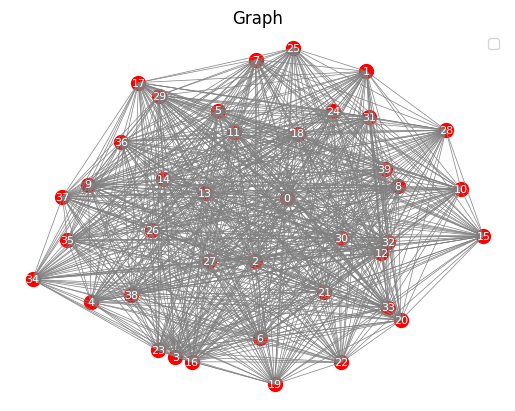

In [6]:
import numpy as np
import random
from Graphs.RandomGraph import RandomGraph
from Graphs.MapGraph import MapGraph
random.seed(0)
np,random.seed(0)

graph = RandomGraph(node_number=40,min_weight=1,max_weight=100)
        
# cities = [
#     "Boos", "Rouen", "Franqueville-Saint-Pierre", "Le Mesnil-Esnard", "Saint-Etienne-Du-Rouvray",
#     "Montmain", "Bois-Guillaume", "Bonsecours", "Sotteville-lès-Rouen", "Mont-Saint-Aignan",
#     "Le Grand-Quevilly", "Le Petit-Quevilly", "Canteleu", "Déville-lès-Rouen", "Darnétal",
#     "Elbeuf", "Oissel", "Maromme", "Cléon", "Saint-Aubin-lès-Elbeuf", "Saint-Aubin-Celloville",
#     "Saint-Martin-du-Vivier", "Saint-Jacques-sur-Darnétal", "Saint-Léger-du-Bourg-Denis",
#     "Saint-Pierre-de-Manneville", "Saint-Pierre-de-Varengeville", "Saint-Martin-de-Boscherville",
#     "Saint-Aubin-Épinay", "Saint-Paër", "Isneauville", "Hénouville", "Houppeville", "Malaunay",
#     "Jumièges", "La Bouille", "Duclair", "Notre-Dame-de-Bondeville", "Petit-Couronne"
# ]

#cities = ["Bouffry","Yermenonville","Valennes","Mondoubleau","Arquenay", "Nantes", "Boos", "La Rochelle", "Bordeaux", "Toulouse", "Montpellier", "Marseille", "Lyon", "Le Mans", "Riom","Bergerac","Vic-sur-Cère", "Clermont-Ferrand","Sucé-sur-Erdre", "Rezé","Rieux"]
#cities = ["Marseille", "Rouen", "Lille", "Quimper", "Colmar", "Paris", "Bayonne", "Toulouse"]
#create real graph
#graph = MapGraph(cities=cities,start_city="Rouen")

graph.plot_graph()

Removed 0 edges of 780
Costed 0 edges of 780


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


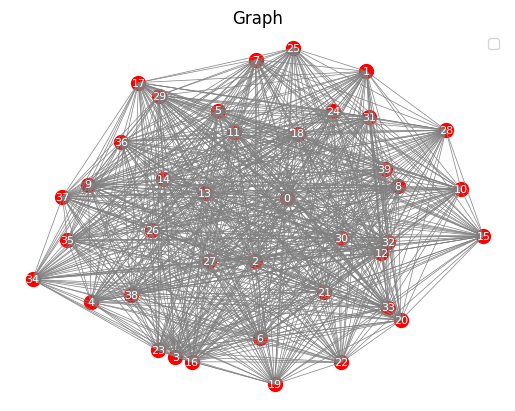

In [7]:
#Filtration
graph.apply_edge_blocking(percentage=0)
graph.apply_edge_costly(percentage=0)

graph.plot_graph()

Algorithm ACO : 100 ants,5 vehicles : 



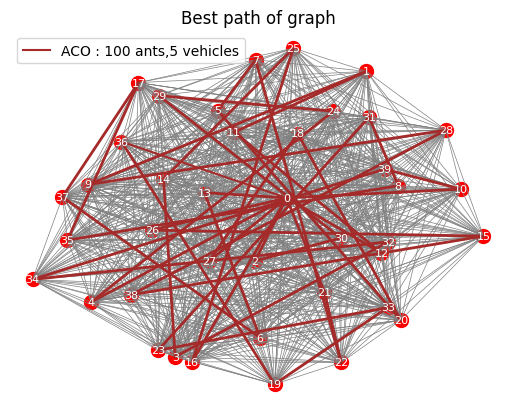

Best paths: [[0, 36, 19, 33, 23, 31, 8, 35, 17, 37, 6, 13, 0], [0, 21, 22, 7, 5, 20, 18, 27, 0], [0, 2, 30, 29, 24, 4, 0], [0, 16, 25, 14, 3, 32, 34, 39, 10, 0], [0, 26, 15, 38, 28, 9, 1, 11, 12, 0]]
Total distance: 594.4404717384833
Number of iterations needed to find the solution : 97
Total number of iterations : 99
Algorithm Tabu Search : 



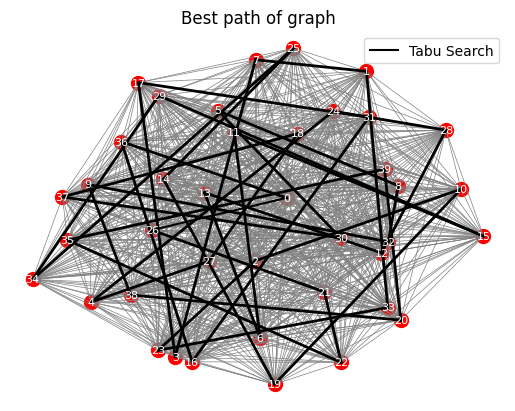

Best paths: [[0, 26, 21, 22, 35, 39, 20, 38, 9, 32, 8, 5, 30, 37, 18, 27, 4, 24, 28, 12, 13, 6, 11, 15, 29, 34, 25, 14, 19, 10, 2, 23, 33, 1, 7, 3, 17, 31, 16, 36, 0]]
Total distance: 676.6135931119411
Number of iterations needed to find the solution : 53
Total number of iterations : 99
Algorithm Tabu Search, 2 vehicles : 



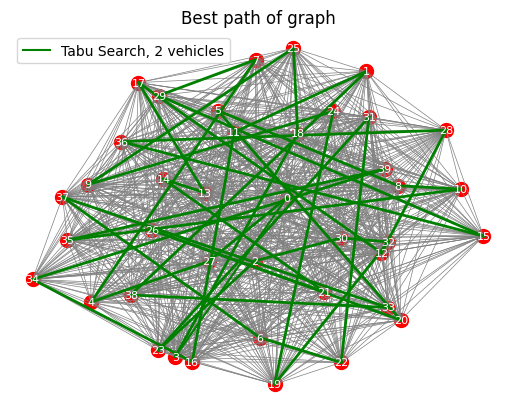

Best paths: [[0, 3, 18, 25, 9, 24, 19, 32, 30, 2, 23, 31, 22, 6, 37, 33, 38, 1, 11, 16, 34, 39, 35, 10, 8, 5, 20, 26, 21, 14, 13, 17, 12, 28, 36, 15, 29, 7, 4, 27, 0]]
Total distance: 699.2392919576898
Number of iterations needed to find the solution : 38
Total number of iterations : 99


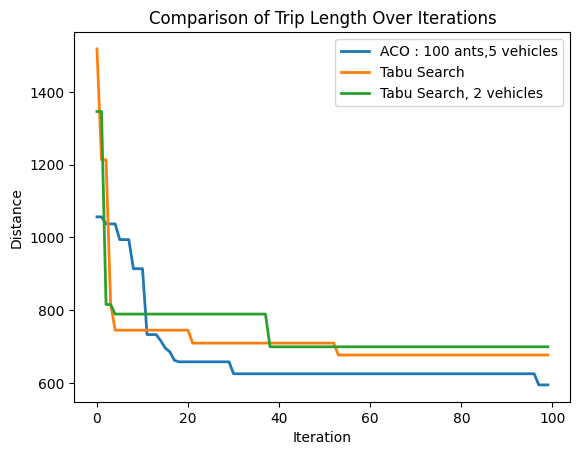

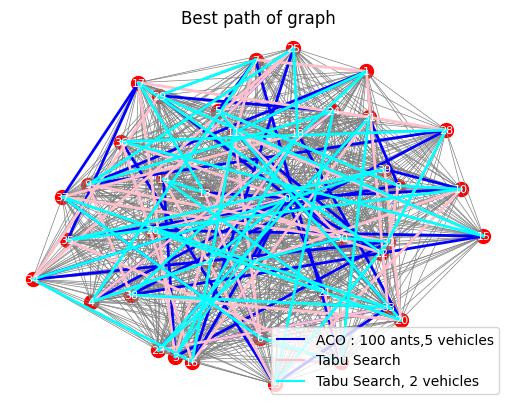

In [10]:
from Algorithms.ACO.AcoAlgo import AcoAlgo
from Algorithms.Greedy.GreedyAlgo import GreedyAlgo
from Algorithms.Tabu.TabuAlgo import TabuAlgo
from utils.plot import Plot

def run_algorithm(graph,algorithm):
    algorithm.run()
    print(f"Algorithm {algorithm.name} : \n")
    vehicles_paths = {i + 1: path for i, path in enumerate(algorithm.paths)}
    current_path_results = {}
    current_path_results[algorithm.name] = vehicles_paths
    algorithms_path_results[algorithm.name] = current_path_results[algorithm.name]
    algorithms_distance_results[algorithm.name] = algorithm.distance_history
    # Print the best path found and the total distance
    graph.plot_graph(current_path_results)
    print(f"Best paths: {algorithm.paths}")
    print(f"Total distance: { algorithm.distance}")
    print(f"Number of iterations needed to find the solution : {algorithm.iterations_needed}")
    print(f"Total number of iterations : {algorithm.total_interations_realized}")
    

def run_algorithms(graph, algorithms):
    for algorithm in algorithms:
        run_algorithm(graph,algorithm)
    Plot.plot_distance_over_iterations_comparison(algorithms_distance_results)
    graph.plot_graph(algorithms_path_results)


algorithms_distance_results = {}
algorithms_path_results = {}
min_iterations = 50
max_iterations = 100
convergence_threshold = 100
# ACO0 = AcoAlgo(graph=graph, name="ACO : 500 ants", num_ants=500, num_vehicles=1,decay=0.7, alpha=0.5, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
# ACO1 = AcoAlgo(graph=graph, name="ACO : 100 ants, 1 vehicule", num_ants=100, num_vehicles=1,decay=0.7, alpha=0.5, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
# ACO2 = AcoAlgo(graph=graph, name="ACO : 100 ants,2 vehicles", num_ants=100, num_vehicles=2,decay=0.7, alpha=0.5, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
# ACO3 = AcoAlgo(graph=graph, name="ACO : 100 ants,3 vehicles", num_ants=100, num_vehicles=3,decay=0.7, alpha=0.5, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
# ACO4 = AcoAlgo(graph=graph, name="ACO : 100 ants,4 vehicles", num_ants=100, num_vehicles=4,decay=0.7, alpha=0.5, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
ACO5 = AcoAlgo(graph=graph, name="ACO : 100 ants,5 vehicles", num_ants=100, num_vehicles=5,decay=0.7, alpha=0.5, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
TABU = TabuAlgo(graph=graph, name="Tabu Search", size_tabou=10, num_vehicles=1, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
TABU2 = TabuAlgo(graph=graph, name="Tabu Search, 2 vehicles", size_tabou=10, num_vehicles=2, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
# GREEDY0 = GreedyAlgo(graph=graph, name= "Greedy Loop",min_iterations=min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
algorithms = [ACO5,TABU,TABU2]
run_algorithms(graph= graph,algorithms=algorithms)

#reset all datas
# del ACO0
# del ACO1
# del ACO2
# del ACO3
# del ACO4
del ACO5
del TABU
del TABU2
# del GREEDY0
del algorithms
del algorithms_distance_results
del algorithms_path_results

